In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('wine-reviews.csv', usecols=['country', 'description', 'points', 'price', 'variety', 'winery'])

In [3]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [4]:
df = df.dropna(subset=['description', 'points'])

In [5]:
df.head()


,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


(array([  397.,   692.,  1836.,  3025.,  6480.,  9530., 12600., 16933.,
        17207., 12226., 15410., 11359.,  9613.,  6489.,  3758.,  1535.,
          523.,   229.,    77.,    52.]),
 array([ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
         91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.]),
 <BarContainer object of 20 artists>)

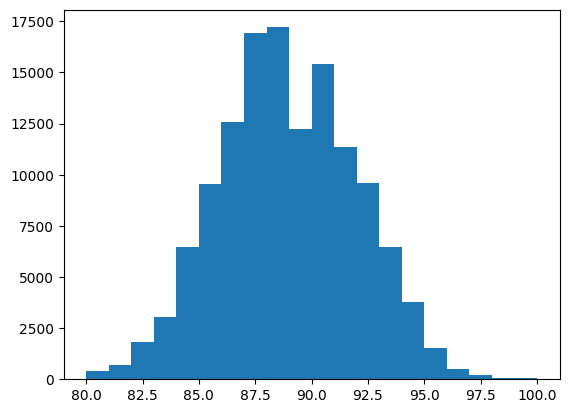

In [6]:
plt.hist(df.points, bins=20)

In [7]:
df['label'] = (df.points >= 90).astype(int)
df = df[['description', 'label']]

In [8]:
df.head()   

,description,label
0,"Aromas include tropical fruit, broom, brimston...",0
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0


In [9]:
train, temp = train_test_split(df, test_size=0.2)

In [10]:
test, val = train_test_split(temp, test_size=0.5)

In [11]:
len(train), len(val), len(test)

(103976, 12998, 12997)

In [12]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
      df = dataframe.copy()
      labels = df.pop('label')
      df = df['description']
      ds = tf.data.Dataset.from_tensor_slices((df, labels))
      if shuffle:
            ds = ds.shuffle(buffer_size=len(dataframe))
      ds = ds.batch(batch_size)
      ds = ds.prefetch(tf.data.AUTOTUNE)
      return ds

In [13]:
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val)
test_ds = df_to_dataset(test)

In [14]:
list(train_ds)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b"After spending 18 months in oak, this wine has emerged toasty and vanilla-laden. That said, there's some impressive fruit underneath, medium-bodied and crisp, with undertones of raspberries and red currants that linger on the concentrated finish. Drink 2020\xe2\x80\x932030.",
        b'Some reduction still swings on the nose in the form of flinty smokiness, once this wears off, pure, taut, zesty lemon comes to the fore and remains the central feature of this streamlined, slender wine. There is midpalate texture and whistle-clean length.',
        b'Veteran winery Taft Street has crafted a gentle, easy-drinking Pinot from the cool Sonoma Coast appellation. The wine is pale in color, dry and crisp, with a silky texture, and has nice varietal flavors of cola, cherries and smoke.',
        ...,
        b'The best thing about this Chardonnay is the acidity. It provides a crisp counterpoint to the fruit and oak, which combine to floo

In [15]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [16]:
hub_layer(train.description[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 3.21447015e-01, -1.80152282e-01, -1.94258511e-01,
         2.13965684e-01, -2.10974231e-01, -3.14797342e-01,
        -1.81947589e-01,  3.17180932e-01, -5.84535062e-01,
         9.00437981e-02,  3.96983102e-02, -1.26470342e-01,
        -2.55498409e-01,  1.26831949e-01, -7.78800026e-02,
        -3.19013447e-01,  1.80017322e-01,  2.25297078e-01,
         7.23853882e-04, -5.33049822e-01, -1.55972555e-01,
        -2.52379954e-01,  4.35911089e-01,  1.39583215e-01,
        -7.63276100e-01, -8.14765096e-02,  1.89023092e-02,
         3.89545530e-01, -4.67565693e-02, -2.27834851e-01,
         3.51974368e-01,  1.92898914e-01,  2.31343135e-01,
        -2.38279834e-01, -5.41042760e-02,  2.71698445e-01,
        -9.77688506e-02,  3.08580160e-01,  1.73699260e-01,
        -3.29668462e-01, -3.04863453e-01,  3.74497682e-01,
         3.98059003e-02,  6.69932663e-02,  2.04935461e-01,
         3.58649969e-01, -1.46022514e-01, -1.94343731e-01,
       

In [20]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5


102/102 [==============================] - 146s 1s/step - loss: 0.5997 - accuracy: 0.6736 - val_loss: 0.4352 - val_accuracy: 0.8224
Epoch 2/5
102/102 [==============================] - 129s 1s/step - loss: 0.4133 - accuracy: 0.8318 - val_loss: 0.3700 - val_accuracy: 0.8357
Epoch 3/5
102/102 [==============================] - 129s 1s/step - loss: 0.3498 - accuracy: 0.8617 - val_loss: 0.3697 - val_accuracy: 0.8344
Epoch 4/5
102/102 [==============================] - 127s 1s/step - loss: 0.3208 - accuracy: 0.8746 - val_loss: 0.3775 - val_accuracy: 0.8350
Epoch 5/5
102/102 [==============================] - 127s 1s/step - loss: 0.3015 - accuracy: 0.8811 - val_loss: 0.3879 - val_accuracy: 0.8352


In [23]:
model.evaluate(test_ds)

13/13 [==============================] - 3s 183ms/step - loss: 0.4130 - accuracy: 0.8221


[0.412952184677124, 0.8221127986907959]